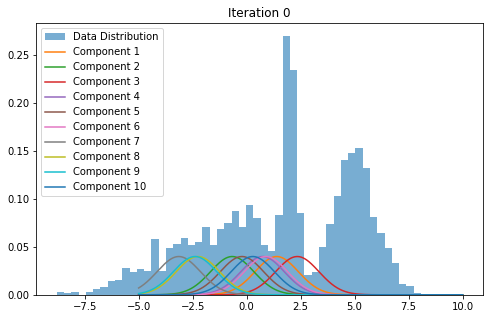

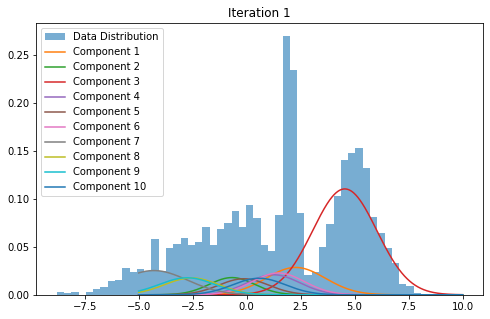

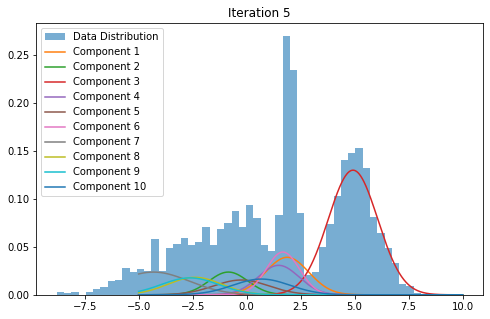

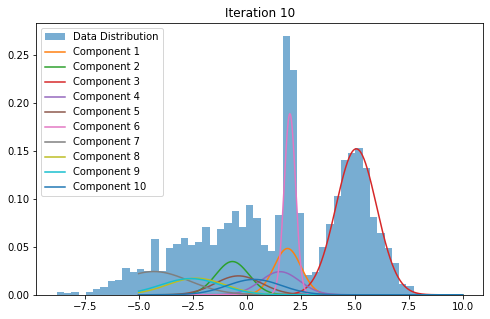

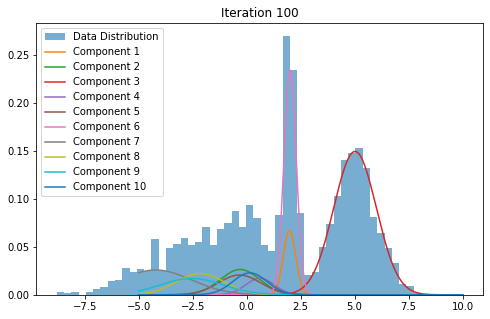

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Generate some synthetic 1D data
np.random.seed(42)
data = np.concatenate([np.random.normal(0, 1, 300), 
                       np.random.normal(5, 1, 700),
                       np.random.normal(-3, 2, 500), 
                       np.random.normal(2, .3, 400)])

# Number of mixtures
K = 10

# Initialize parameters
mus = np.random.normal(0, 2, K)
sigmas = np.ones(K)
pis = np.ones(K) / K

iterations_to_plot = [0, 1, 5,10,100]

x = np.linspace(-5, 10, 1000)
for iteration in range(max(iterations_to_plot) + 1):
    # plotting the data and EM estimates
    if iteration in iterations_to_plot:
        plt.figure(figsize=(8, 5))
        plt.hist(data, bins=50, density=True, alpha=0.6, label='Data Distribution')
        for k in range(K):
            plt.plot(x, pis[k] * norm.pdf(x, mus[k], sigmas[k]), label=f'Component {k+1}')
        plt.title(f'Iteration {iteration}')
        plt.legend()
        plt.show()
    
    # E-step: compute responsibilities
    r = np.zeros((len(data), K))
    for k in range(K):
        r[:, k] = pis[k] * norm.pdf(data, mus[k], sigmas[k])
    r = r / r.sum(axis=1, keepdims=True)
    
    # M-step: update parameters
    N_ks = r.sum(axis=0)
    for k in range(K):
        mus[k] = 1. / N_ks[k] * np.sum(r[:, k] * data)
        sigmas[k] = np.sqrt(1. / N_ks[k] * np.sum(r[:, k] * (data - mus[k])**2))
        pis[k] = N_ks[k] / len(data)


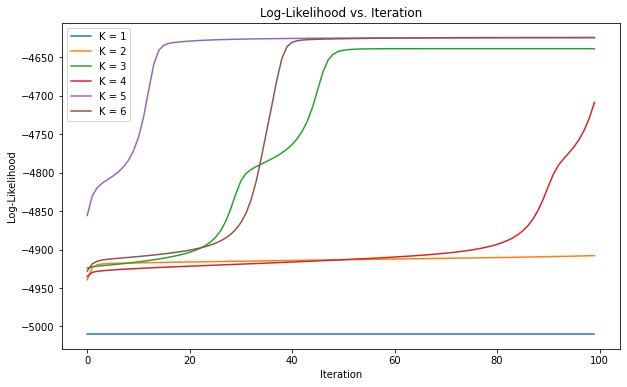

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Generate some synthetic 1D data
np.random.seed(42)
data = np.concatenate([
    np.random.normal(0, 1, 300),
    np.random.normal(5, 1, 700),
    np.random.normal(-3, 2, 500),
    np.random.normal(2, .3, 400)
])

# Prepare plot
plt.figure(figsize=(10, 6))

# Number of mixtures
for R in range(6):
    K = R + 1
    mus = np.random.normal(0, 2, K)
    sigmas = np.ones(K)
    pis = np.ones(K) / K

    log_likelihood = []

    # EM iterations
    for iteration in range(100):
        # E-step
        r = np.zeros((len(data), K))
        for k in range(K):
            r[:, k] = pis[k] * norm.pdf(data, mus[k], sigmas[k])
        r = r / r.sum(axis=1, keepdims=True)

        # M-step
        N_ks = r.sum(axis=0)
        for k in range(K):
            mus[k] = 1. / N_ks[k] * np.sum(r[:, k] * data)
            sigmas[k] = np.sqrt(1. / N_ks[k] * np.sum(r[:, k] * (data - mus[k])**2))
            pis[k] = N_ks[k] / len(data)

        # Compute log-likelihood
        ll = 0
        for i in range(len(data)):
            s = 0
            for k in range(K):
                s += pis[k] * norm.pdf(data[i], mus[k], sigmas[k])
            ll += np.log(s)
        log_likelihood.append(ll)

    # Plotting
    plt.plot(log_likelihood, label=f"K = {K}")

plt.title('Log-Likelihood vs. Iteration')
plt.xlabel('Iteration')
plt.ylabel('Log-Likelihood')
plt.legend()
plt.show()


# Survival Analysis

In [16]:
import pandas as pd

url = "https://hastie.su.domains/CASI_files/DATA/ncog.txt"
df = pd.read_csv(url, delim_whitespace=True)


#drop the first three columns that don't play any role. 
df = df.iloc[:, 3:]

# Display the first few rows of the dataframe
print(df)


    day  month  year    t  d arm
0    19      6    78  248  1   A
1    15     12    78  160  1   A
2    20      7    78  319  0   A
3    17     11    78  277  1   A
4    15     12    78  440  1   A
..  ...    ...   ...  ... ..  ..
91    5     10    83  519  1   B
92    6     10    83  613  0   B
93   23     11    83  547  0   B
94    1      5    84  195  1   B
95    3      5    84  119  1   B

[96 rows x 6 columns]


In [18]:
print(df)

      t  d arm
0   248  1   A
1   160  1   A
2   319  0   A
3   277  1   A
4   440  1   A
..  ... ..  ..
91  519  1   B
92  613  0   B
93  547  0   B
94  195  1   B
95  119  1   B

[96 rows x 3 columns]


## EM for missing data (from Book Chapter 9.5)

/var/folders/4v/b9_kq9zs7bj6z_wftdmf52140000gn/T/ipykernel_11976/1604584000.py:9: RuntimeWarning: covariance is not positive-semidefinite.
  samples = np.random.multivariate_normal(mean, cov, 100)


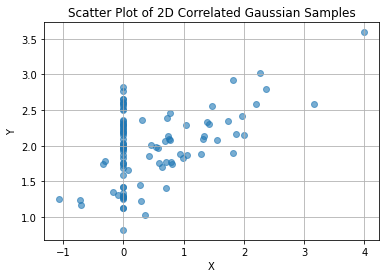

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
mean = [1, 2]
cov = [[1, 0.452], [0.511, .123]]  # Example covariance matrix indicating some correlation

# Generate 100 samples
samples = np.random.multivariate_normal(mean, cov, 100)

# Set x-values of 50 samples to zero
zero_indices = np.random.choice(100, 50, replace=False)
samples[zero_indices, 0] = 0

# Plot
plt.scatter(samples[:, 0], samples[:, 1], alpha=0.6)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Scatter Plot of 2D Correlated Gaussian Samples')
plt.grid(True)
plt.show()


# Recycling


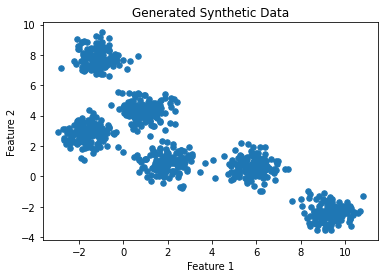

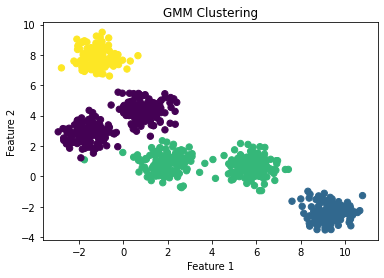

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.datasets import make_blobs

# Create synthetic data
data, _ = make_blobs(n_samples=800, centers=6, cluster_std=0.60, random_state=0)
plt.scatter(data[:, 0], data[:, 1], s=30);
plt.title("Generated Synthetic Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

#Gaussian mixture model
gmm = GaussianMixture(n_components=4, random_state=0).fit(data)
labels = gmm.predict(data)


#Visualize the learning
plt.scatter(data[:, 0], data[:, 1], c=labels, s=40, cmap='viridis');
plt.title("GMM Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()
